<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/KELP_Raster_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 40.4 MB/s eta 0:00:00


In [3]:
import rasterio

In [5]:
from rasterio.plot import show
from rasterio.plot import show_hist

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '/content/drive/MyDrive/test_satellite'

In [10]:
files = os.listdir(path)

In [11]:
files[0:2]

['HP480632_satellite.tif', 'HP504630_satellite.tif']

In [12]:
src = rasterio.open(os.path.join(path, files[0]))

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


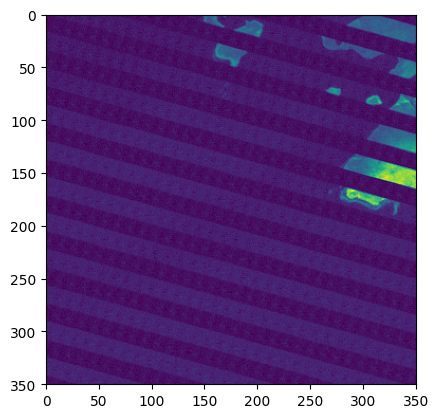

<Axes: >

In [13]:
show(src)

In [14]:
src.shape

(350, 350)

In [15]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': None,
 'width': 350,
 'height': 350,
 'count': 7,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

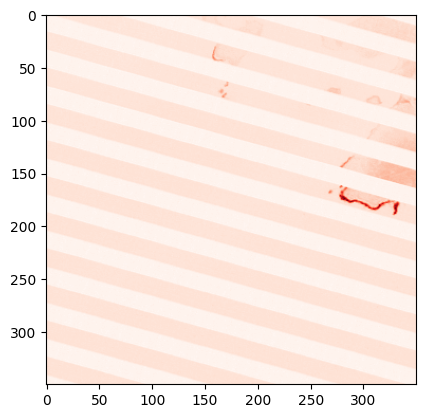

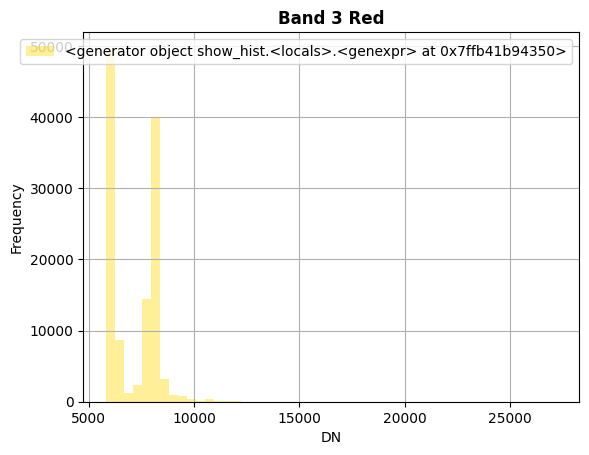

In [17]:
show(src.read(3),cmap='Reds')
show_hist(src.read(3),title='Band 3 Red',bins=50,histtype='stepfilled',alpha=0.4)

Text(0, 0.5, 'reflectance')

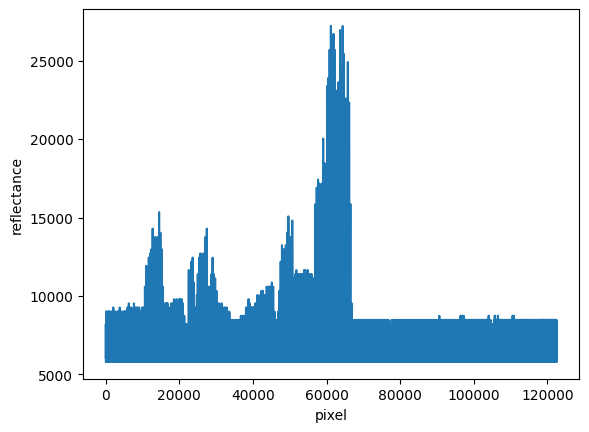

In [21]:
#### plot reflectance of RED

y = src.read(3)
y = y.flatten()

x = np.arange(len(y))

plt.plot(x,y)
plt.xlabel('pixel')
plt.ylabel('reflectance' )

Text(0, 0.5, 'mean reflectance')

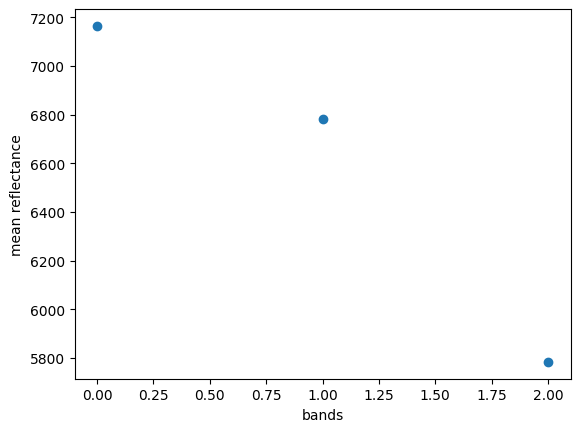

In [96]:
RED = src.read(3)
GREEN = src.read(4)
BLUE = src.read(5)
NIR = src.read(2)
SWIR = src.read(1)

y=[RED.mean(),GREEN.mean(),BLUE.mean()]
x= np.arange(3)

plt.scatter(x,y)
plt.xlabel('bands')
plt.ylabel('mean reflectance')

In [50]:
df = pd.DataFrame()
df['RED'] = RED.flatten()
df['GREEN'] = GREEN.flatten()
df['BLUE'] = BLUE.flatten()
df['NIR'] = NIR.flatten()
df['SWIR'] = SWIR.flatten()

<Axes: >

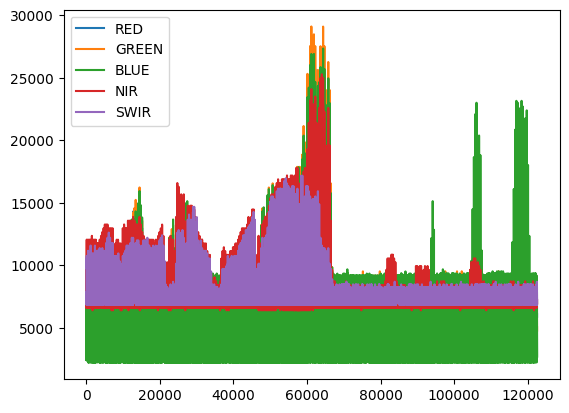

In [51]:
df.plot()

In [53]:
df1 = pd.DataFrame()
df1['min']=[SWIR.min(),NIR.min(),RED.min(),GREEN.min(),BLUE.min()]
df1['max']=[SWIR.max(),NIR.max(),RED.max(),GREEN.max(),BLUE.max()]
df1['mean']=[SWIR.mean(),NIR.mean(),RED.mean(),GREEN.mean(),BLUE.mean()]


In [55]:
df1

,min,max,mean
0,6828,17162,7648.424653
1,6389,25280,7708.146041
2,5798,27209,7165.134220
3,4541,29102,6781.154531
4,2216,27338,5782.867853


<Axes: >

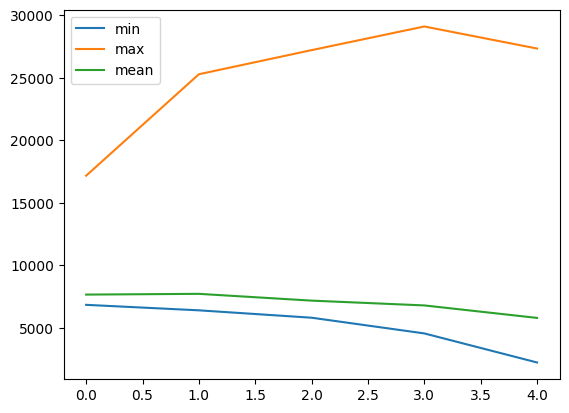

In [54]:
df1.plot()

In [44]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.1 MB/s eta 0:00:00


In [46]:
import earthpy as ep
import earthpy.spatial as es

In [ ]:
###In general, NDVI values range from -1.0 to 1.0, with negative values indicating clouds and water,
### positive values near zero indicating bare soil,
###and higher positive values of NDVI ranging from sparse vegetation (0.1 - 0.5) to dense green vegetation (0.6 and above).

In [56]:
ndvi = es.normalized_diff(RED,NIR)
mndwi = es.normalized_diff(GREEN,SWIR)

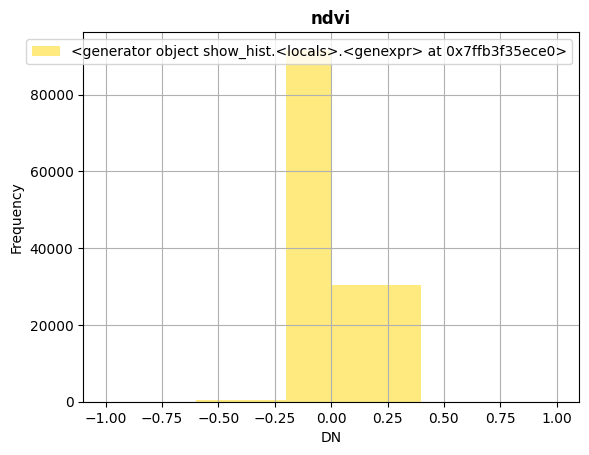

In [49]:
show_hist(ndvi,bins=[-1,-0.6,-0.2,0,0.4,0.8,1],histtype='stepfilled',title='ndvi',alpha=0.5)

In [ ]:
### Normalize Difference Water Index (NDWI) value lies between -1 to 1. Generally, water bodies NDWI value is greater than 0.5.
###  Vegetation has much smaller values which distinguishing vegetation from water bodies easily

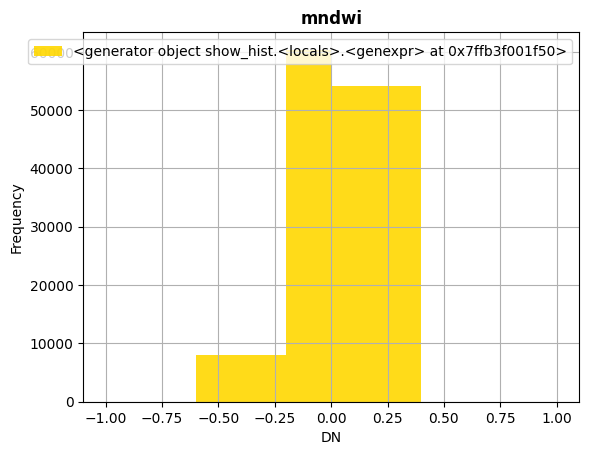

In [63]:
show_hist(mndwi,bins=[-1,-0.6,-0.2,0,0.4,0.8,1],histtype='stepfilled',title='mndwi',alpha=0.9)

Text(0.5, 1.0, 'mndwi')

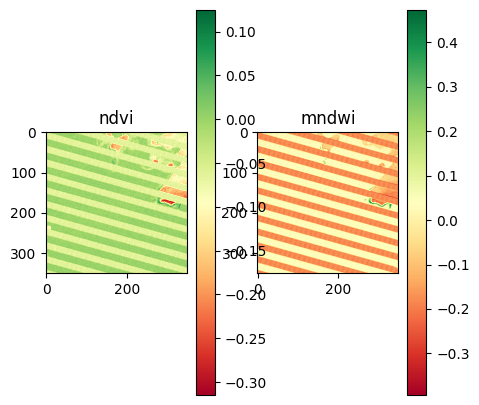

In [105]:
fig,ax = plt.subplots(1,2,figsize=(5,5))
fig.colorbar(ax[0].imshow(ndvi,cmap='RdYlGn'),ax=ax[0])
fig.colorbar(ax[1].imshow(mndwi,cmap='RdYlGn'),ax=ax[1])
ax[0].imshow(ndvi,cmap='RdYlGn')
ax[1].imshow(mndwi,cmap='RdYlGn')
ax[0].set_title('ndvi')
ax[1].set_title('mndwi')


Text(0.5, 1.0, 'GREEN')

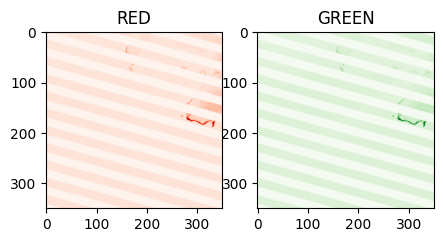

In [104]:
fig,ax = plt.subplots(1,2,figsize=(5,5))
ax[0].imshow(RED,cmap='Reds')
ax[1].imshow(GREEN,cmap='Greens')
ax[0].set_title('RED')
ax[1].set_title('GREEN')